In [1]:
import matplotlib.pyplot as plt 

In [2]:
def parse_csv(file_path, delimiter):
    csv_file = open(file_path, 'r').read().split('\n')
    csv_header = csv_file[0].split(delimiter)
    csv_data = csv_file[1:]
    
    csv_data = [parse_csv_data_line(row, csv_header, delimiter) for row in csv_data]
    
    return csv_data

In [3]:
def parse_csv_data_line(data_row, csv_header, delimiter):
    columns = data_row.split(delimiter)
    parsed_row = {}
    
    for column_index in range(len(csv_header)):
        if column_index < len(columns): 
            parsed_row[csv_header[column_index]] = columns[column_index]
        
    return parsed_row

In [4]:
parsed_csv = parse_csv('./kc_house_data.csv', ',')

print(parsed_csv[0])

{'id': '"7129300520"', 'date': '"20141013T000000"', 'price': '221900', 'bedrooms': '3', 'bathrooms': '1', 'sqft_living': '1180', 'sqft_lot': '5650', 'floors': '"1"', 'waterfront': '0', 'view': '0', 'condition': '3', 'grade': '7', 'sqft_above': '1180', 'sqft_basement': '0', 'yr_built': '1955', 'yr_renovated': '0', 'zipcode': '"98178"', 'lat': '47.5112', 'long': '-122.257', 'sqft_living15': '1340', 'sqft_lot15': '5650'}


In [5]:
training_data_number = 200
sizes = []
prices = []

for data_index in range(training_data_number):
    try:
        size = int(parsed_csv[data_index]['sqft_living']) / 1000
        price = int(parsed_csv[data_index]['price']) / 1000
        
        sizes.append(size)
        prices.append(price)
    except:
        None

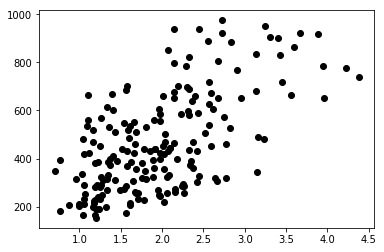

In [6]:
plt.plot(sizes, prices, 'o', color='black')

In [7]:
theta0, theta1 = 100, 10

def h(x):
    return theta0 + theta1 * x

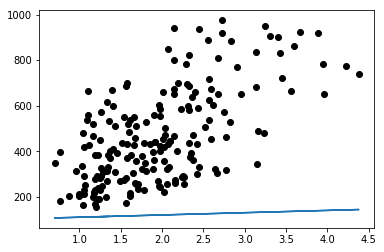

In [8]:
plt.plot(sizes, prices, 'o', color='black')
plt.plot(sizes, [h(x) for x in sizes])

In [9]:
def calculate_cost(fn, inputs, outputs):
    inputs_length = len(inputs)
    
    squared_output_diffrence = [(fn(inputs[i]) - outputs[i]) ** 2 for i in range(inputs_length)]
    
    return (1 / (2 * inputs_length)) * sum(squared_output_diffrence)

In [10]:
initial_cost = calculate_cost(h, sizes, prices)

print(initial_cost)
print(h(sizes[0]))

79701.19139341846
111.8


In [11]:
def derivative_of_theta_0(fn, inputs, outputs):
    inputs_length = len(inputs)
    
    output_diffrence = [(fn(inputs[i]) - outputs[i]) for i in range(inputs_length)]
    
    return (1 / inputs_length) * sum(output_diffrence)

def derivative_of_theta_1(fn, inputs, outputs):
    inputs_length = len(inputs)
    
    output_diffrence = [(fn(inputs[i]) - outputs[i]) * inputs[i] for i in range(inputs_length)]
    
    return (1 / inputs_length) * sum(output_diffrence)

def gradient_descent(inputs, outputs, learning_rate, epochs):
    global theta0
    global theta1
    
    costs = []
    
    for i in range(epochs):
        new_theta0 = theta0 - derivative_of_theta_0(h, inputs, outputs) * learning_rate
        new_theta1 = theta1 - derivative_of_theta_1(h, inputs, outputs) * learning_rate
        
        theta0, theta1 = new_theta0, new_theta1

        costs.append(calculate_cost(h, inputs, outputs))
        
    return costs

In [12]:
costs = gradient_descent(sizes, prices, 0.1, 400)

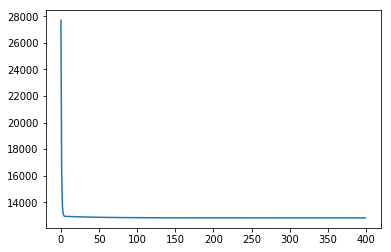

In [16]:
plt.plot(list(range(400)), costs)

In [17]:
testing_data_number = 200
testing_sizes = []
testing_prices = []

for data_index in range(training_data_number, training_data_number + testing_data_number):
    try:
        size = int(parsed_csv[data_index]['sqft_living']) / 1000
        price = int(parsed_csv[data_index]['price']) / 1000
        
        testing_sizes.append(size)
        testing_prices.append(price)
    except:
        None

In [19]:
final_cost = calculate_cost(h, testing_sizes, testing_prices)

In [21]:
print(f'initial cost: {initial_cost}, final cost: {final_cost}')

initial cost: 79701.19139341846, final cost: 13023.633327946141


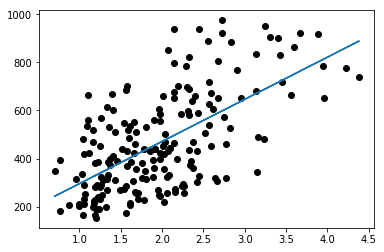

In [22]:
plt.plot(sizes, prices, 'o', color='black')
plt.plot(sizes, [h(x) for x in sizes])